In [67]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os
import pywt
from skimage.feature import hog
from skimage import exposure

In [68]:
#function to write frames
import math
def writeFrames(videoPath,video_path,frames_folder,count1):
    path = video_path + "/" + videoPath
    print(path)
    cap = cv2.VideoCapture(path)
    frameRate = cap.get(5) 
    count2 = 1
    while(cap.isOpened()):
        #print("hi")
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        #if (frameId % math.floor(frameRate) == 0):
        file_name = class_name + (str(count1) + str(count2)) + ".jpg"
        file_path = frames_folder + "/" + file_name
        cv2.imwrite(file_path, frame)
        class_file_names_dict[class_name].append(file_path)
        count2 += 1
    cap.release()
    return file_path       
    
    


In [69]:
path_to_data = "./datasetFinal_v2"
path_to_frames = "./frames"

In [70]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./datasetFinal_v2\\demand',
 './datasetFinal_v2\\home',
 './datasetFinal_v2\\money',
 './datasetFinal_v2\\more',
 './datasetFinal_v2\\they']

In [72]:
import shutil
if os.path.exists(path_to_frames):
     shutil.rmtree(path_to_frames)
os.mkdir(path_to_frames)

In [73]:
img_dirs

['./datasetFinal_v2\\demand',
 './datasetFinal_v2\\home',
 './datasetFinal_v2\\money',
 './datasetFinal_v2\\more',
 './datasetFinal_v2\\they']

In [74]:
image_dirs = []
class_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    class_name = img_dir.split("\\")[-1]
    #print(img_dir)
    class_file_names_dict[class_name] = []
    for entry in os.listdir(img_dir):
        #print(entry)
        frames_folder = path_to_frames + "/" + class_name
        video_path = path_to_data + "/" + class_name
        if not os.path.exists(frames_folder):
            os.makedirs(frames_folder)
            image_dirs.append(frames_folder)
        
        file_path = writeFrames(entry,video_path,frames_folder,count)
        
        count += 1
    

./datasetFinal_v2/demand/demand_01.mp4
./datasetFinal_v2/demand/demand_02.mp4
./datasetFinal_v2/demand/demand_03.mp4
./datasetFinal_v2/demand/demand_04.mp4
./datasetFinal_v2/demand/demand_05.mp4
./datasetFinal_v2/demand/demand_06.mp4
./datasetFinal_v2/demand/demand_07.mp4
./datasetFinal_v2/demand/demand_08.mp4
./datasetFinal_v2/demand/demand_09.mp4
./datasetFinal_v2/demand/demand_10.mp4
./datasetFinal_v2/home/home_01.mp4
./datasetFinal_v2/home/home_02.mp4
./datasetFinal_v2/home/home_03.mp4
./datasetFinal_v2/home/home_04.mp4
./datasetFinal_v2/home/home_05.mp4
./datasetFinal_v2/home/home_06.mp4
./datasetFinal_v2/home/home_07.mp4
./datasetFinal_v2/home/home_08.mp4
./datasetFinal_v2/home/home_09.mp4
./datasetFinal_v2/home/home_10.mp4
./datasetFinal_v2/money/money_01.mp4
./datasetFinal_v2/money/money_02.mp4
./datasetFinal_v2/money/money_03.mp4
./datasetFinal_v2/money/money_04.mp4
./datasetFinal_v2/money/money_05.mp4
./datasetFinal_v2/money/money_06.mp4
./datasetFinal_v2/money/money_07.mp4
.

In [75]:
img_dirs

['./datasetFinal_v2\\demand',
 './datasetFinal_v2\\home',
 './datasetFinal_v2\\money',
 './datasetFinal_v2\\more',
 './datasetFinal_v2\\they']

In [76]:
class_dict = {}
count = 1
for class_name in class_file_names_dict.keys():
    class_dict[class_name] = count
    count = count + 1
class_dict

{'demand': 1, 'home': 2, 'money': 3, 'more': 4, 'they': 5}

In [21]:
class_file_names_dict

{'demand': ['./datasetFinal_v2/frames/demand/demand11.jpg',
  './datasetFinal_v2/frames/demand/demand12.jpg',
  './datasetFinal_v2/frames/demand/demand13.jpg',
  './datasetFinal_v2/frames/demand/demand14.jpg',
  './datasetFinal_v2/frames/demand/demand15.jpg',
  './datasetFinal_v2/frames/demand/demand16.jpg',
  './datasetFinal_v2/frames/demand/demand17.jpg',
  './datasetFinal_v2/frames/demand/demand18.jpg',
  './datasetFinal_v2/frames/demand/demand19.jpg',
  './datasetFinal_v2/frames/demand/demand110.jpg',
  './datasetFinal_v2/frames/demand/demand111.jpg',
  './datasetFinal_v2/frames/demand/demand112.jpg',
  './datasetFinal_v2/frames/demand/demand113.jpg',
  './datasetFinal_v2/frames/demand/demand114.jpg',
  './datasetFinal_v2/frames/demand/demand115.jpg',
  './datasetFinal_v2/frames/demand/demand116.jpg',
  './datasetFinal_v2/frames/demand/demand117.jpg',
  './datasetFinal_v2/frames/demand/demand118.jpg',
  './datasetFinal_v2/frames/demand/demand119.jpg',
  './datasetFinal_v2/frames/de

In [77]:
def hogFeatures(image):
    resized_img = cv2.resize(image, (128,64))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd

In [78]:
# adding individual frame fd to X 
X, y = [], []
for class_name, training_files in class_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        fd = hogFeatures(img)
        X.append(fd)
        y.append(class_dict[class_name])

In [79]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [81]:
len(X_train)

2856

In [82]:
len(X_test)

715

In [83]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00       140
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       144

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



In [86]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [87]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [88]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.996848,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.982144,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.994398,{'logisticregression__C': 5}


In [89]:
best_clf = best_estimators['svm']

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 87,   0,   0,   0,   0],
       [  0, 116,   0,   0,   0],
       [  0,   0, 121,   1,   0],
       [  0,   0,   0, 102,   0],
       [  0,   0,   0,   0,  87]], dtype=int64)

Text(69.0, 0.5, 'Truth')

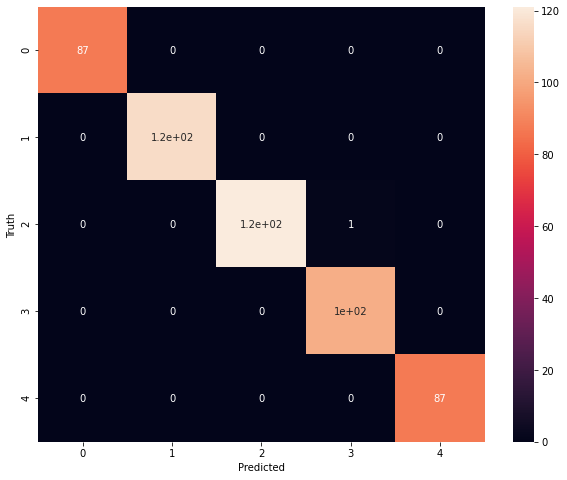

In [62]:
import seaborn as sn
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
X1 = []

video = cv2.VideoCapture("./outputs/they (10).mp4")
count = 0
while(video.isOpened()):
    ret, frame = video.read()
    if ret == True:
        #print("hi")
        count += 1
        fd = hogFeatures(frame)
        X1.append(fd)
        #X1.append(reshape_img)
    else:
        break
video.release()
cv2.destroyAllWindows()
    

In [107]:
best_clf.predict(X1)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [108]:
from statistics import mode

In [109]:
value = mode(best_clf.predict(X1))

In [110]:
def getKey(val):
    for key, value in class_dict.items():
         if val == value:
             print("The word for the given video: "+key)

In [111]:
getKey(value)

The word for the given video: they


SyntaxError: invalid syntax (<ipython-input-98-f2f8867aef20>, line 1)